In [1]:
import pipeline
import model_loader
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch
import time

DEVICE = "cpu"

ALLOW_CUDA = True
ALLOW_MPS = True

print(torch.backends.mps.is_available())

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.backends.mps.is_built() or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

# prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = '''A futuristic city'''
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "../images/dog.jpg"
# input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

## SAMPLER
num_inference_steps = 30
seed = 23

'''output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)'''

# Combine the input image and the output image into a single image.
#Image.fromarray(output_image)

True
Using device: mps


'output_image = pipeline.generate(\n    prompt=prompt,\n    uncond_prompt=uncond_prompt,\n    input_image=input_image,\n    strength=strength,\n    do_cfg=do_cfg,\n    cfg_scale=cfg_scale,\n    sampler_name=sampler,\n    n_inference_steps=num_inference_steps,\n    seed=seed,\n    models=models,\n    device=DEVICE,\n    idle_device="cpu",\n    tokenizer=tokenizer,\n)'

In [3]:
start = time.time()
images_ddim = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name="ddim",
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)
time_process = time.time() - start
print("DDIM time:", time_process)
output = Image.fromarray(images_ddim)
output.save("./3_{time_process}.png")

100%|██████████| 30/30 [01:33<00:00,  3.13s/it]


DDIM time: 112.24538707733154


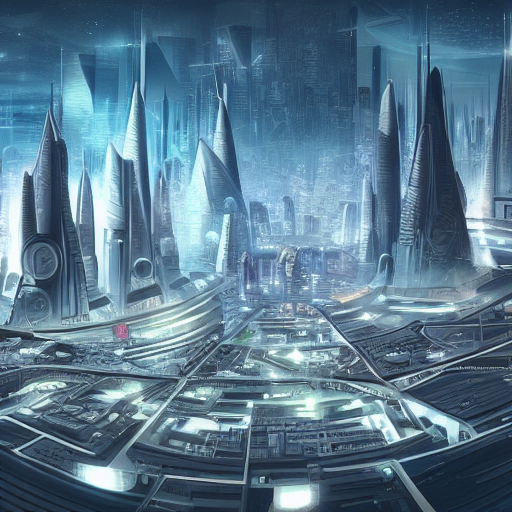

In [4]:
output

100%|██████████| 30/30 [01:15<00:00,  2.52s/it]


DDPM time: 114.83988833427429


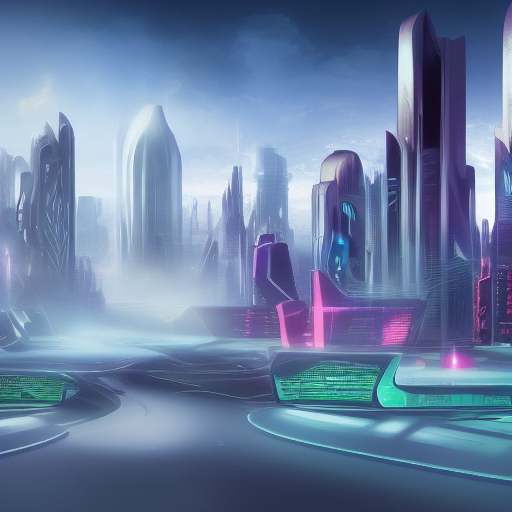

In [5]:
start = time.time()
images_ddpm = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name="ddpm",
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)
time_process = time.time() - start
print("DDPM time:", time_process)
Image.fromarray(images_ddpm)
#output.save("./2_" + time_process + ".png")

In [6]:
Image.fromarray(images_ddpm).save('./1_114.png')

In [ ]:
output